# Flower Type Classification

In [117]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


### Enable GPU

In [118]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Load the dataset from the structured folders

- Split the dataset into training and testing sets
- Create DataLoaders for training and testing

In [119]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from PIL import Image

dataset = datasets.ImageFolder(root='../data/raw')

train_data, test_data, train_label, test_label = train_test_split(dataset.imgs, dataset.targets, test_size=0.2, random_state=42)

# ImageLoader Class

class ImageLoader(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = self.checkChannel(dataset) # some images are CMYK, Grayscale, check only RGB 
        self.transform = transform
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, item):
        image = Image.open(self.dataset[item][0])
        classCategory = self.dataset[item][1]
        if self.transform:
            image = self.transform(image)
        return image, classCategory
        
    def checkChannel(self, dataset):
        datasetRGB = []
        for index in range(len(dataset)):
            if (Image.open(dataset[index][0]).getbands() == ("R", "G", "B")): # Check Channels
                datasetRGB.append(dataset[index])
        return datasetRGB


### Define transforms for preprocessing

In [120]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

train_dataset = ImageLoader(train_data, transform)
test_dataset = ImageLoader(test_data, transform)


In [121]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Show image

In [122]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


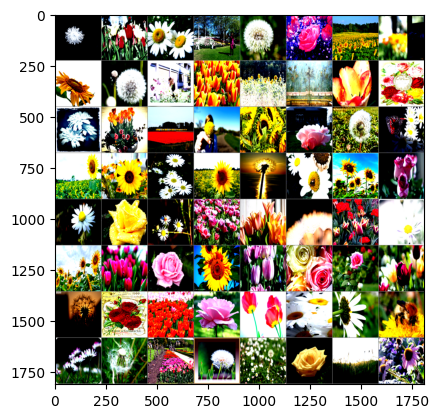

dandelion tulip daisy tulip dandelion rose sunflower tulip sunflower dandelion rose tulip sunflower rose tulip rose dandelion tulip tulip dandelion sunflower rose dandelion daisy sunflower sunflower daisy sunflower dandelion daisy sunflower rose daisy rose daisy tulip tulip dandelion tulip daisy sunflower tulip rose sunflower tulip rose rose tulip dandelion rose tulip rose tulip daisy daisy dandelion daisy dandelion tulip dandelion dandelion rose dandelion daisy


In [123]:
class_to_label = {
    0: 'daisy',
    1: 'dandelion',
    2: 'rose',
    3: 'sunflower',
    4: 'tulip',
}

for images, labels in train_loader:
    imshow(torchvision.utils.make_grid(images))
    class_labels = [class_to_label.get(label.item(), 'Unknow') for label in labels]
    print(' '.join(f'{label}' for label in class_labels))
    break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


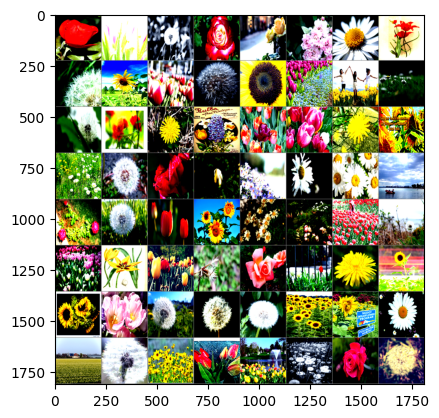

rose tulip dandelion rose rose rose daisy tulip dandelion sunflower tulip dandelion sunflower tulip tulip daisy dandelion rose dandelion tulip tulip tulip dandelion sunflower daisy dandelion rose rose daisy daisy daisy rose rose dandelion tulip sunflower daisy rose tulip dandelion tulip tulip tulip dandelion rose tulip dandelion sunflower sunflower tulip dandelion dandelion dandelion sunflower sunflower daisy tulip dandelion sunflower tulip tulip dandelion rose dandelion


In [130]:
for images, labels in test_loader:
    imshow(torchvision.utils.make_grid(images))
    class_labels = [class_to_label.get(label.item(), 'Unknow') for label in labels]
    print(' '.join(f'{label}' for label in class_labels))
    break

### Load model

In [125]:
from tqdm import tqdm
from torchvision import models
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions

model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)

model.to(device)

/home/slam/project/data_analysis/flower_type_classifcation/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/slam/project/data_analysis/flower_type_classifcation/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Loss and optimizer

In [126]:
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Train and test

In [127]:
def train(num_epoch, model):
    model.train()
    for epoch in range(0, num_epoch):
        correct_predictions  = 0.0
        total_samples  = 0
        losses = []
        loop = tqdm(enumerate(train_loader), total=len(train_loader)) # create a progress bar
        
        for batch_idx, (data, targets) in loop:
            data = data.to(device=device)
            targets = torch.tensor(targets).to(device=device)  # Convert targets to a tensor
            scores = model(data)
            
            loss = criterion(scores, targets)
            optimizer.zero_grad()
            losses.append(loss)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(scores, 1)
            correct_predictions += torch.sum(preds == targets).item()
            total_samples += data.size(0)
            loop.set_description(f"Epoch {epoch+1}/{num_epoch} process: {int((batch_idx / len(train_loader)) * 100)}")
            loop.set_postfix(loss=loss.data.item())
        
        # Calculate accuracy
        accuracy = correct_predictions / total_samples * 100
        
        checkpoint_path = "../checkpoint/checkpoint_epoch_{}.pt".format(epoch)
        
        # save model
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            'accuracy': accuracy
        }, checkpoint_path)


In [128]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, predictions = torch.max(output, 1)
            correct += (predictions == y).sum().item()
            test_loss = criterion(output, y)
            
    test_loss /= len(test_loader.dataset)
    print("Average Loss: ", test_loss, "  Accuracy: ", correct, " / ",
    len(test_loader.dataset), "  ", int(correct / len(test_loader.dataset) * 100), "%")

In [129]:
train(10, model)
test()

  0%|          | 0/35 [00:00<?, ?it/s]/tmp/ipykernel_35745/11752830.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets).to(device=device)  # Convert targets to a tensor
Epoch 10/10 process: 97: 100%|██████████| 35/35 [00:18<00:00,  1.85it/s, loss=0.496] 


Average Loss:  tensor(0.0003, device='cuda:0')   Accuracy:  506  /  550    92 %


### load model

In [134]:
print("----> Loading checkpoint")
checkpoint = torch.load("../checkpoint/checkpoint_epoch_4.pt") # Try to load last checkpoint
model.load_state_dict(checkpoint["model_state_dict"]) 
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

----> Loading checkpoint


In [135]:
batch_size = 1

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [136]:
with torch.no_grad():
    model.eval()
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        print(f"predicted ----> {predicted[0]}")

predicted ----> 3
predicted ----> 1
predicted ----> 2
predicted ----> 1
predicted ----> 1
predicted ----> 0
predicted ----> 4
predicted ----> 3
predicted ----> 3
predicted ----> 2
predicted ----> 2
predicted ----> 1
predicted ----> 4
predicted ----> 0
predicted ----> 0
predicted ----> 4
predicted ----> 0
predicted ----> 4
predicted ----> 4
predicted ----> 1
predicted ----> 2
predicted ----> 2
predicted ----> 3
predicted ----> 2
predicted ----> 4
predicted ----> 1
predicted ----> 3
predicted ----> 2
predicted ----> 4
predicted ----> 4
predicted ----> 0
predicted ----> 3
predicted ----> 4
predicted ----> 0
predicted ----> 2
predicted ----> 1
predicted ----> 3
predicted ----> 2
predicted ----> 2
predicted ----> 2
predicted ----> 0
predicted ----> 3
predicted ----> 1
predicted ----> 0
predicted ----> 4
predicted ----> 1
predicted ----> 1
predicted ----> 3
predicted ----> 2
predicted ----> 1
predicted ----> 3
predicted ----> 0
predicted ----> 3
predicted ----> 2
predicted ----> 1
predicted 

### Function to predict image

In [150]:
def RandomImagePrediction(filepath):
    img_array = Image.open(filepath).convert("RGB")
    data_transforms=transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(), 
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
    img = data_transforms(img_array).unsqueeze(dim=0) # Returns a new tensor with a dimension of size one inserted at the specified position.
    load = DataLoader(img)
    
    for x in load:
        x=x.to(device)
        pred = model(x)
        _, preds = torch.max(pred, 1)
        print(f"class : {preds}")
        class_ = preds[0].cpu().item()
        print(f'predicted ----> {class_to_label.get(class_)}')

In [153]:
RandomImagePrediction("../data/raw/dandelion/5110104894_a52c685516_n.jpg")
RandomImagePrediction("../data/raw/daisy/9529916092_de70623523_n.jpg")
RandomImagePrediction("../data/raw/rose/16229215579_e7dd808e9c.jpg")
RandomImagePrediction("../data/raw/sunflower/6606806621_5267acdd38.jpg")
RandomImagePrediction("../data/raw/tulip/4263272885_1a49ea5209.jpg")

class : tensor([1], device='cuda:0')
predicted ----> dandelion
class : tensor([0], device='cuda:0')
predicted ----> daisy
class : tensor([2], device='cuda:0')
predicted ----> rose
class : tensor([3], device='cuda:0')
predicted ----> sunflower
class : tensor([4], device='cuda:0')
predicted ----> tulip
